In [14]:
import pygmt
import pandas as pd

# Inset region parameters
inset_region = [ 24, 46, 34, 44 ]
w_ratio = 3
h_ratio = (w_ratio * 1.29 * (inset_region[3]-inset_region[2]))/(inset_region[1]-inset_region[0])

# Selected region parameters
hypocenter = [32.3, 40.2]        # lon-lat

#selected_region = [ 25.5, 30.5, 39, 41.5 ]
#selected_region = [ 30, 35, 39, 41.5 ]
selected_region = [ hypocenter[0]-2.5, hypocenter[0]+2, hypocenter[1]-1, hypocenter[1]+1 ]
rectangle = [[selected_region[0], selected_region[2], selected_region[1], selected_region[3]]]


# generate GMT map
cmap = "files/elevation_colormap.cpt"
grid="files/TR_10s.grd"

# Import province
prov=pd.read_csv("files/provinces.txt", sep="\s+") 

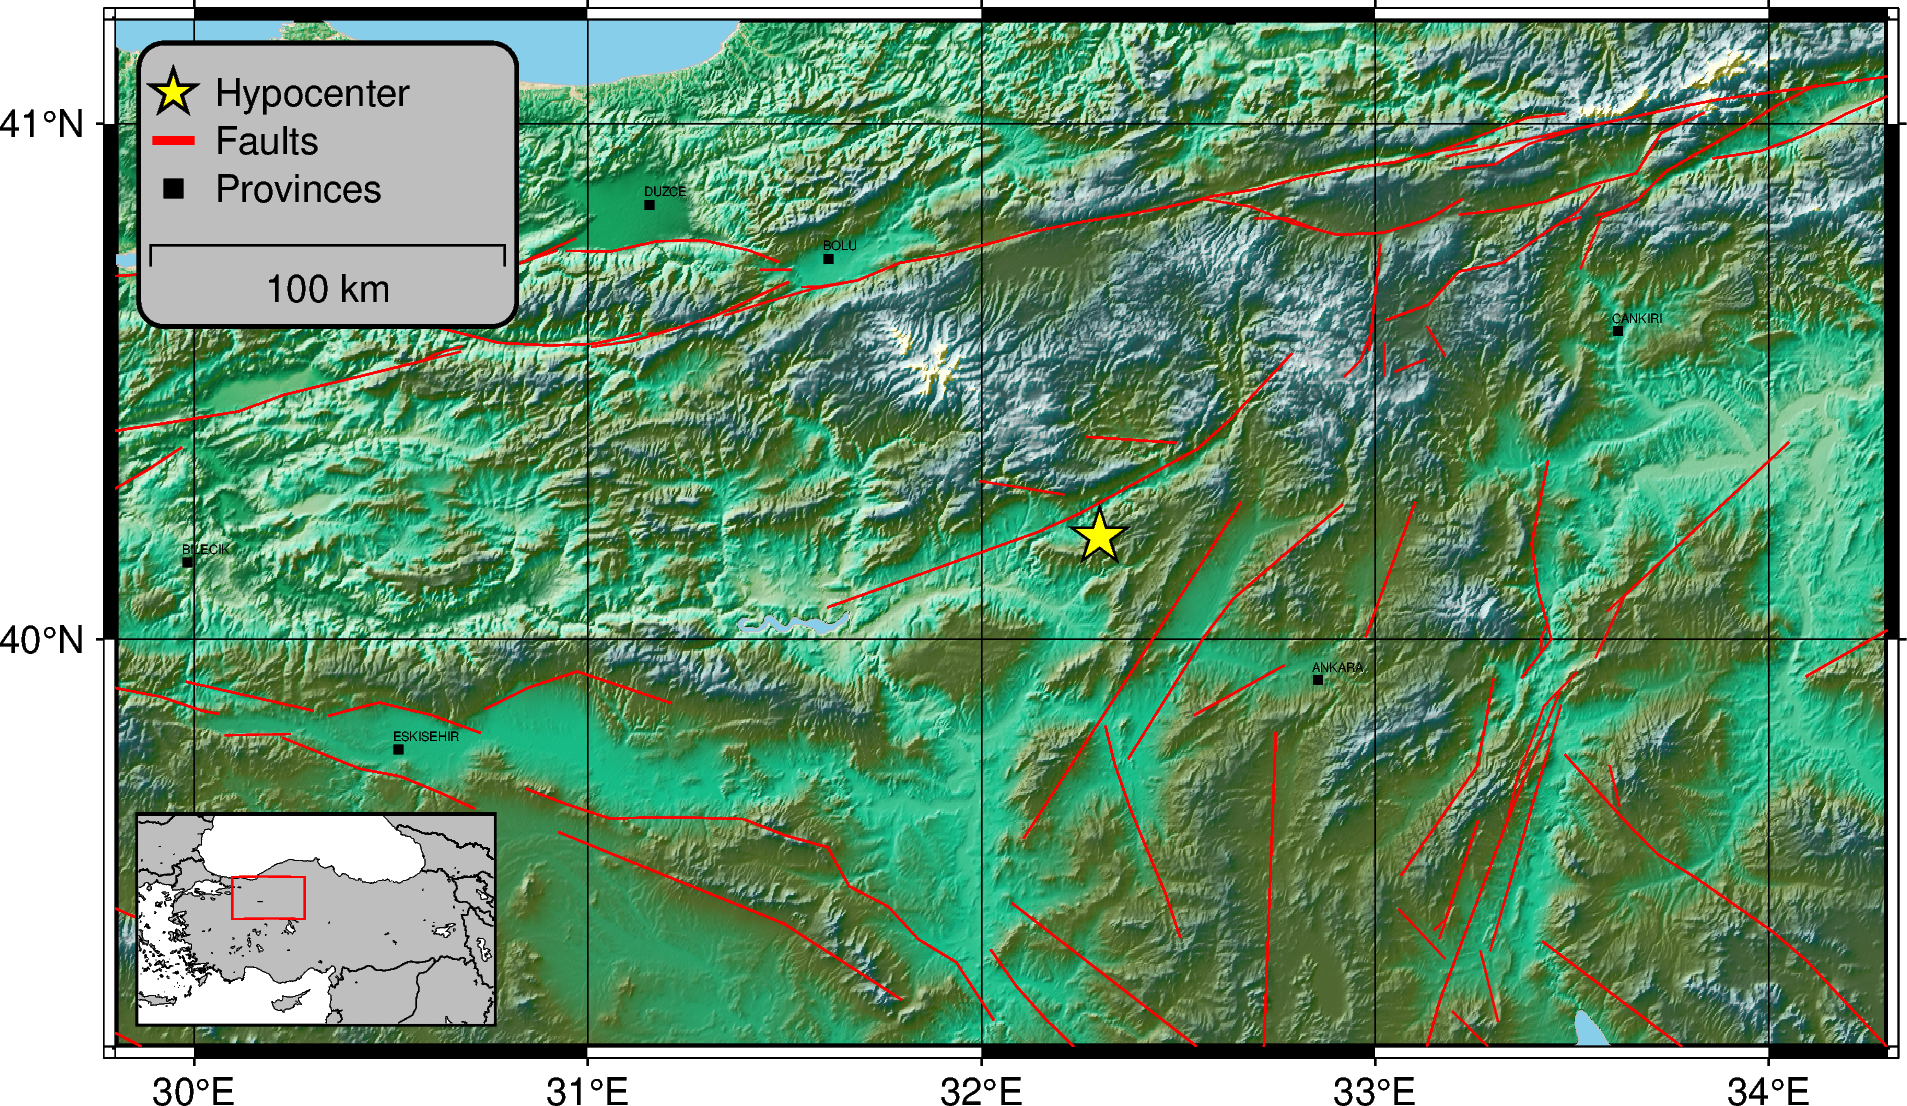

In [15]:
fig = pygmt.Figure()

# plot topography
KWARGS = dict( grid=grid, region=selected_region, projection='M15c', cmap=cmap, frame=0)
fig.grdimage(shading=True,  **KWARGS)  # Add illumination
#pygmt.makecpt( cmap="topo", series='0/5000/500', continuous=True )
#fig.grdimage( grid=grid, region=selected_region, projection='M15c', shading=True, frame=True )


fig.coast( region=selected_region,
           resolution = "f",
           borders="2/thin",
           shorelines="0.05,gray",
           projection="M15c",
           water="skyblue",
           frame="ag" )

# Plot Hypocenter
fig.plot( x=hypocenter[0], y=hypocenter[1],
          style="a0.5c",
          color='yellow',
          pen="0.5,black" )

# Geological faults
fig.plot( data="files/gem_active_faults.gmt",
          pen="0.4,red" )

#Plot province locations
fig.plot(x=prov.lon, y=prov.lat, 
         style="s0.1c",
         color='black',
         pen="black")

# Plot province names
fig.text(textfiles=None,x=prov.lon-0.015, y=prov.lat+0.025,
         position=None,
         text=prov.names, 
         angle=0,
         font='3p,Helvetica,black', 
         justify='LM')

# Plot Legend
fig.legend( spec="files/legend.txt", 
            position="JTL+jTL+o0.2c+w3.2/2.4",
            box="+ggray+p1p+r")




# This does not include an inset fill as it is covered by the inset figure
with fig.inset(position=f"jBL+w{w_ratio}c/{h_ratio}c+o0.2c/0.2c", box="+pblack"):
    
    # Use a plotting function to create a figure inside the inset
    fig.coast( region=inset_region,
               resolution = 'f',
               projection="M3c",
               land="gray",
               borders=[1, 2],
               shorelines="0.05p",
               water="white" )
    
    # Create rectangle for selected region
    fig.plot( data=rectangle, 
              style="r+s",
              pen="0.4,red"  )
    
    
    
fig.savefig("figures/example.png", transparent=False, crop=True, anti_alias=True, dpi=1000)
fig.show()
